## Import modules

In [1]:
import transfermat_scatt as ts  # source code of Johannes
import tscat_Overleaf as ts_L  # source code in Overleaf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.ndimage.filters import gaussian_filter

/var/folders/4f/70rj7tsn539589t552zhyw300000gn/T/ipykernel_17394/2138681009.py:10: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


## Dielectric $\varepsilon$ and dispersive $\kappa$

In [2]:
def eps_DL(epsinf, omegap, omega, omega0=0, gamma=0, k0=0):
    eps = epsinf + (omegap**2 / ((omega0**2 - omega**2) - 1j * gamma * omega))  # dispersive dielectric function
    n = np.sqrt(eps)
    
    if k0 != 0:
        k = k0 * ((omegap**2 * omega) / (omega0 * ((omega0**2 - omega**2) - 1j * gamma * omega)))  # chiral coupling
        return eps, n, k

    else:
        return eps, n, k0

In [105]:
omega=1.6
theta=np.arcsin(4*1e-3*(1239.4/(2*np.pi*omega*np.sqrt(2.89))))
print(np.rad2deg(theta))

16.86294247377432


## Calculation, Overleaf code, with HP cavity with chiral material ($\kappa\neq0$)

In [120]:
omega = np.linspace(1.9, 2.1, 500)  # Omega in eV
ngrid = np.ones_like((omega))
######################################################################
scatTOT = list()
#####################
# PRESERVING MIRROR 1
##########################################################
omegaPR = 2.0
gammaPR = 0.01

tP = gammaPR / (1j * (omega - omegaPR) + gammaPR)
rM =  np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
phase = tP / rM
tPM = np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
t = np.sqrt((1 - np.abs(tPM)**2) / 2.0)
phit = np.pi / 2
pst = np.exp(1j * phit)

tPP_r = t * pst 
tMP_r = 0.0j * ngrid
tPM_r = tPM * phase 
tMM_r = t * pst

tPP_l = t * pst 
tMP_l = tPM * phase 
tPM_l = 0.0j * ngrid
tMM_l = t * pst 

rPP_r = tPM * pst**4 * (1/phase)**3 
rMP_r = - t * (1 / phase)**2 * (pst**3) 
rPM_r = - t * (1 / phase)**2 * (pst**3) 
rMM_r = 0.0j * ngrid

rPP_l = 0.0j * ngrid
rMP_l = t * (phase**2) * (1 / pst)
rPM_l = t * (phase**2) * (1 / pst)
rMM_l = - tPM * phase

t1_right = [tPP_r, tMP_r, tPM_r, tMM_r]
t1_left = [tPP_l, tMP_l, tPM_l, tMM_l]
r1_right = [rPP_r, rMP_r, rPM_r, rMM_r]
r1_left = [rPP_l, rMP_l, rPM_l, rMM_l]

scatTOT.append([t1_right,t1_left,r1_right,r1_left])
##########################################################

#####################
# PRESERVING MIRROR 2
#######################################################
omegaPR = 2.0
gammaPR = 0.01

tP = gammaPR / (1j * (omega - omegaPR) + gammaPR)
rM =  np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
phase = tP / rM
tPM = np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
t = np.sqrt((1 - np.abs(tPM)**2) / 2.0)
phit = np.pi / 2
pst = np.exp(1j * phit)

tPP_r = t * pst
tMP_r = tPM * phase
tPM_r = 0.0j * ngrid
tMM_r = t * pst

tPP_l = t * pst
tMP_l = 0.0j * ngrid
tPM_l = tPM * phase
tMM_l = t * pst

rPP_r = 0.0j * ngrid
rMP_r = - t * (1 / phase)**2 * (pst**3) 
rPM_r = - t * (1 / phase)**2 * (pst**3) 
rMM_r = tPM * pst**4 * (1 / phase)**3

rPP_l = - tPM * phase
rMP_l = t * (phase**2) * (1 / pst)
rPM_l = t * (phase**2) * (1 / pst)
rMM_l = 0.0j * ngrid

t2_right = [tPP_r, tMP_r, tPM_r, tMM_r]
t2_left = [tPP_l, tMP_l, tPM_l, tMM_l]
r2_right = [rPP_r, rMP_r, rPM_r, rMM_r]
r2_left = [rPP_l, rMP_l, rPM_l, rMM_l]

scatTOT.append([t2_right,t2_left,r2_right,r2_left])
#########################################################

coupl = np.linspace(70, 450, 500)

Tplist = []
Tmlist = []
Rplist = []
Rmlist = []
DCTlist = []

for i in range(len(coupl)):
 
    ################
    # INCIDENT ANGLE
    ################
    theta0 = 0.0
    ################
    
    #####
    # AIR
    ##############
    n1 = 1 * ngrid
    mu1 = 1 * ngrid
    k1 = 0 * ngrid
    d1 = np.inf
    ##############
    
    #####################
    # PRESERVING MIRROR 1
    ######################
    mu2 = 1 * ngrid
    k2 = 0 * ngrid
    n2 = 1 * ngrid
    d2 = 0
    ######################

    ######
    # AIR
    ##############
    n3 = 1 * ngrid
    mu3 = 1 * ngrid
    k3 = 0 * ngrid
    d3 = 0.01
    ##############
    
    #################
    # CHIRAL MATERIAL
    ##########################################################################################
    epsinf = 2.89
    omegapChiral = 0.5
    eps4M, n4, k4 = eps_DL(epsinf, omegapChiral, omega, omega0 = 2.2, gamma = 0.05, k0 = 1e-3)
    mu4 = 1 * ngrid
    dL = coupl[i]
    ########################################################################################## 

    ######
    # AIR
    ##############
    n5 = 1 * ngrid
    mu5 = 1 * ngrid
    k5 = 0 * ngrid
    d5 = 0.01
    ####################### 
    
    #####################
    # PRESERVING MIRROR 2
    ######################
    mu6 = 1 * ngrid
    k6 = 0 * ngrid
    n6 = 1 * ngrid
    d6 = 0
    ######################

    #####
    # AIR
    ##############
    n7 = 1 * ngrid
    mu7 = 1 * ngrid
    k7 = 0 * ngrid
    d7 = np.inf
    ##############
    
    ########################################
    # ALL THE ARRAYS OF THE INPUT PARAMETERS
    ######################################################################
    nTOT = [n1, n2, n3, n4, n5, n6, n7]
    muTOT = [mu1, mu2, mu3, mu4, mu5, mu6, mu7]
    kTOT = [k1, k2, k3, k4, k5, k6, k7] 
    dTOT = [d1, d2, d3, dL, d5, d6, d7] 
    matTOT = ['air', 'Custom', 'air', 'ChiralMat', 'air', 'Custom', 'air']
    ######################################################################
    
    ######################
    # CALLING OF THE CLASS
    #############################################################################
    tScatHP = ts_L.TScat(theta0, nTOT, muTOT, kTOT, dTOT, omega, matTOT, scatTOT)  
    #############################################################################
    
    Tplist.append(tScatHP.Tsp)
    Tmlist.append(tScatHP.Tsm)
    Rplist.append(tScatHP.Rsp)
    Rmlist.append(tScatHP.Rsm)
    DCTlist.append(tScatHP.dct_s)

Tplist, Tmlist, Rplist, Rmlist, DCTlist = map(np.array, [Tplist, Tmlist, Rplist, Rmlist, DCTlist])

## Calculation, Overleaf code, with Hybrid cavity with chiral material ($\kappa\neq0$)

In [3]:
omega = np.linspace(1.6, 2.4, 500)  # Omega in eV
ngrid = np.ones_like((omega))
######################################################################
scatTOT = list()
#####################
# PRESERVING MIRROR 1
##########################################################
omegaPR = 2.0
gammaPR = 0.05

tP = gammaPR / (1j * (omega - omegaPR) + gammaPR)
rM =  np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
phase = tP / rM
tPM = np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
t = np.sqrt((1 - np.abs(tPM)**2) / 2.0)
phit = np.pi / 2
pst = np.exp(1j * phit)

tPP_r = t * pst 
tMP_r = 0.0j * ngrid
tPM_r = tPM * phase 
tMM_r = t * pst

tPP_l = t * pst 
tMP_l = tPM * phase 
tPM_l = 0.0j * ngrid
tMM_l = t * pst 

rPP_r = tPM * pst**4 * (1/phase)**3 
rMP_r = - t * (1 / phase)**2 * (pst**3) 
rPM_r = - t * (1 / phase)**2 * (pst**3) 
rMM_r = 0.0j * ngrid

rPP_l = 0.0j * ngrid
rMP_l = t * (phase**2) * (1 / pst)
rPM_l = t * (phase**2) * (1 / pst)
rMM_l = - tPM * phase

t1_right = [tPP_r, tMP_r, tPM_r, tMM_r]
t1_left = [tPP_l, tMP_l, tPM_l, tMM_l]
r1_right = [rPP_r, rMP_r, rPM_r, rMM_r]
r1_left = [rPP_l, rMP_l, rPM_l, rMM_l]

scatTOT.append([t1_right,t1_left,r1_right,r1_left])
##########################################################

#####################
# PRESERVING MIRROR 2
#######################################################
omegaPR = 2.0
gammaPR = 0.05

tP = gammaPR / (1j * (omega - omegaPR) + gammaPR)
rM =  np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
phase = tP / rM
tPM = np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
t = np.sqrt((1 - np.abs(tPM)**2) / 2.0)
phit = np.pi / 2
pst = np.exp(1j * phit)

tPP_r = t * pst
tMP_r = tPM * phase
tPM_r = 0.0j * ngrid
tMM_r = t * pst

tPP_l = t * pst
tMP_l = 0.0j * ngrid
tPM_l = tPM * phase
tMM_l = t * pst

rPP_r = 0.0j * ngrid
rMP_r = - t * (1 / phase)**2 * (pst**3) 
rPM_r = - t * (1 / phase)**2 * (pst**3) 
rMM_r = tPM * pst**4 * (1 / phase)**3

rPP_l = - tPM * phase
rMP_l = t * (phase**2) * (1 / pst)
rPM_l = t * (phase**2) * (1 / pst)
rMM_l = 0.0j * ngrid

t2_right = [tPP_r, tMP_r, tPM_r, tMM_r]
t2_left = [tPP_l, tMP_l, tPM_l, tMM_l]
r2_right = [rPP_r, rMP_r, rPM_r, rMM_r]
r2_left = [rPP_l, rMP_l, rPM_l, rMM_l]

#scatTOT.append([t2_right,t2_left,r2_right,r2_left])
#########################################################

coupl = np.linspace(150, 250, 500)

TpHYlist = []
TmHYlist = []
RpHYlist = []
RmHYlist = []
DCTHYlist = []

for i in range(len(coupl)):
 
    ################
    # INCIDENT ANGLE
    ################
    theta0 = 0.0
    ################
    
    #####
    # AIR
    ##############
    n1 = 1 * ngrid
    mu1 = 1 * ngrid
    k1 = 0 * ngrid
    d1 = np.inf
    ##############
    
    #####################
    # MIRROR 
    ######################
    epsinf = 4.77574276
    omegapMirr = 9.48300763
    eps2M, n2, k2 = eps_DL(epsinf, omegapMirr, omega, omega0 = 0.0, gamma = 0.17486845, k0 = 0.0)
    mu2 = 1 * ngrid
    k2 = 0 * ngrid
    d2 = 30
    ######################

    
    #################
    # CHIRAL MATERIAL
    ##########################################################################################
    epsinf = 2.89
    omegapChiral = 0.1
    eps4M, n4, k4 = eps_DL(epsinf, omegapChiral, omega, omega0 = 2.0, gamma = 0.05, k0 = 1e-3)
    mu4 = 1 * ngrid
    dL = coupl[i]
    ########################################################################################## 

    ######
    # AIR
    ##############
    n5 = 1 * ngrid
    mu5 = 1 * ngrid
    k5 = 0 * ngrid
    d5 = 0.001
    ####################### 
    
    #####################
    # PRESERVING MIRROR 2
    ######################
    mu6 = 1 * ngrid
    k6 = 0 * ngrid
    n6 = 1 * ngrid
    d6 = 0
    ######################

    #####
    # AIR
    ##############
    n7 = 1 * ngrid
    mu7 = 1 * ngrid
    k7 = 0 * ngrid
    d7 = np.inf
    ##############
    
    ########################################
    # ALL THE ARRAYS OF THE INPUT PARAMETERS
    ######################################################################
    nTOT = [n1, n2, n4, n5, n6, n7]
    muTOT = [mu1, mu2, mu4, mu5, mu6, mu7]
    kTOT = [k1, k2, k4, k5, k6, k7] 
    dTOT = [d1, d2, dL, d5, d6, d7] 
    matTOT = ['air', 'mirr', 'ChiralMat', 'air', 'Custom', 'air']
    ######################################################################
    
    ######################
    # CALLING OF THE CLASS
    #############################################################################
    tScatHY = ts_L.TScat(theta0, nTOT, muTOT, kTOT, dTOT, omega, matTOT, scatTOT)  
    #############################################################################
    
    TpHYlist.append(tScatHY.Tsp)
    TmHYlist.append(tScatHY.Tsm)
    RpHYlist.append(tScatHY.Rsp)
    RmHYlist.append(tScatHY.Rsm)
    DCTHYlist.append(tScatHY.dct_s)

TpHYlist, TmHYlist, RpHYlist, RmHYlist, DCTHYlist = map(np.array, [TpHYlist, TmHYlist, RpHYlist, RmHYlist, DCTHYlist])

In [174]:
omega = np.linspace(1.5, 2.9, 500)  # Omega in eV
ngrid = np.ones_like((omega))
######################################################################
scatTOT = list()
#####################
# PRESERVING MIRROR 1
##########################################################
omegaPR = 2.0
gammaPR = 0.01

tP = gammaPR / (1j * (omega - omegaPR) + gammaPR)
rM =  np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
phase = tP / rM
tPM = np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
t = np.sqrt((1 - np.abs(tPM)**2) / 2.0)
phit = np.pi / 2
pst = np.exp(1j * phit)

tPP_r = t * pst 
tMP_r = 0.0j * ngrid
tPM_r = tPM * phase 
tMM_r = t * pst

tPP_l = t * pst 
tMP_l = tPM * phase 
tPM_l = 0.0j * ngrid
tMM_l = t * pst 

rPP_r = tPM * pst**4 * (1/phase)**3 
rMP_r = - t * (1 / phase)**2 * (pst**3) 
rPM_r = - t * (1 / phase)**2 * (pst**3) 
rMM_r = 0.0j * ngrid

rPP_l = 0.0j * ngrid
rMP_l = t * (phase**2) * (1 / pst)
rPM_l = t * (phase**2) * (1 / pst)
rMM_l = - tPM * phase

t1_right = [tPP_r, tMP_r, tPM_r, tMM_r]
t1_left = [tPP_l, tMP_l, tPM_l, tMM_l]
r1_right = [rPP_r, rMP_r, rPM_r, rMM_r]
r1_left = [rPP_l, rMP_l, rPM_l, rMM_l]

scatTOT.append([t1_right,t1_left,r1_right,r1_left])
##########################################################

#####################
# PRESERVING MIRROR 2
#######################################################
omegaPR = 2.0
gammaPR = 0.01

tP = gammaPR / (1j * (omega - omegaPR) + gammaPR)
rM =  np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
phase = tP / rM
tPM = np.abs(gammaPR / (1j * (omega - omegaPR) + gammaPR))
t = np.sqrt((1 - np.abs(tPM)**2) / 2.0)
phit = np.pi / 2
pst = np.exp(1j * phit)

tPP_r = t * pst
tMP_r = tPM * phase
tPM_r = 0.0j * ngrid
tMM_r = t * pst

tPP_l = t * pst
tMP_l = 0.0j * ngrid
tPM_l = tPM * phase
tMM_l = t * pst

rPP_r = 0.0j * ngrid
rMP_r = - t * (1 / phase)**2 * (pst**3) 
rPM_r = - t * (1 / phase)**2 * (pst**3) 
rMM_r = tPM * pst**4 * (1 / phase)**3

rPP_l = - tPM * phase
rMP_l = t * (phase**2) * (1 / pst)
rPM_l = t * (phase**2) * (1 / pst)
rMM_l = 0.0j * ngrid

t2_right = [tPP_r, tMP_r, tPM_r, tMM_r]
t2_left = [tPP_l, tMP_l, tPM_l, tMM_l]
r2_right = [rPP_r, rMP_r, rPM_r, rMM_r]
r2_left = [rPP_l, rMP_l, rPM_l, rMM_l]

#scatTOT.append([t2_right,t2_left,r2_right,r2_left])
#########################################################

coupl = np.linspace(70, 450, 500)

TpHYElist = []
TmHYElist = []
RpHYElist = []
RmHYElist = []
DCTHYElist = []

for i in range(len(coupl)):
 
    ################
    # INCIDENT ANGLE
    ################
    theta0 = 0.0
    ################
    
    #####
    # AIR
    ##############
    n1 = 1 * ngrid
    mu1 = 1 * ngrid
    k1 = 0 * ngrid
    d1 = np.inf
    ##############
    
    #####################
    # MIRROR 
    ######################
    epsinf = 4.77574276
    omegapMirr = 9.48300763
    eps2M, n2, k2 = eps_DL(epsinf, omegapMirr, omega, omega0 = 0.0, gamma = 0.17486845, k0 = 0.0)
    mu2 = 1 * ngrid
    k2 = 0 * ngrid
    d2 = 30
    ######################

    ######
    # AIR
    ##############
    n4 = 1 * ngrid
    mu4 = 1 * ngrid
    k4 = 0 * ngrid
    dL = coupl[i]
    ####################### 
    
    
    #####################
    # PRESERVING MIRROR 2
    ######################
    mu6 = 1 * ngrid
    k6 = 0 * ngrid
    n6 = 1 * ngrid
    d6 = 0
    ######################

    #####
    # AIR
    ##############
    n7 = 1 * ngrid
    mu7 = 1 * ngrid
    k7 = 0 * ngrid
    d7 = np.inf
    ##############
    
    ########################################
    # ALL THE ARRAYS OF THE INPUT PARAMETERS
    ######################################################################
    nTOT = [n1, n2, n4, n6, n7]
    muTOT = [mu1, mu2, mu4, mu6, mu7]
    kTOT = [k1, k2, k4, k6, k7] 
    dTOT = [d1, d2, dL, d6, d7] 
    matTOT = ['air', 'mirr', 'air', 'Custom', 'air']
    ######################################################################
    
    ######################
    # CALLING OF THE CLASS
    #############################################################################
    tScatHYE = ts_L.TScat(theta0, nTOT, muTOT, kTOT, dTOT, omega, matTOT, scatTOT)  
    #############################################################################
    
    TpHYElist.append(tScatHYE.Tsp)
    TmHYElist.append(tScatHYE.Tsm)
    RpHYElist.append(tScatHYE.Rsp)
    RmHYElist.append(tScatHYE.Rsm)
    DCTHYElist.append(tScatHYE.dct_s)

TpHYElist, TmHYElist, RpHYElist, RmHYElist, DCTHYElist = map(np.array, [TpHYElist, TmHYElist, RpHYElist, RmHYElist, DCTHYElist])

## Calculation, Overleaf code, with Ag cavity with chiral material ($\kappa\neq 0$)

In [109]:
omega = np.linspace(1.5, 2.9, 500)  # Omega in eV
ngrid = np.ones_like((omega))
coupl = np.linspace(70, 450, 500)

TplistAg = []
TmlistAg = []
RplistAg = []
RmlistAg = []
DCTlistAg = []

for i in range(len(coupl)):
 
    ################
    # INCIDENT ANGLE
    ################
    theta0 = coupl[i]
    ################
    
    #####
    # AIR
    ##############
    n1 = 1 * ngrid
    mu1 = 1 * ngrid
    k1 = 0 * ngrid
    d1 = np.inf
    ##############
    
    #####################
    # MIRROR 
    ######################
    epsinf = 4.77574276
    omegapMirr = 9.48300763
    eps2M, n2, k2 = eps_DL(epsinf, omegapMirr, omega, omega0 = 0.0, gamma = 0.17486845, k0 = 0.0)
    mu2 = 1 * ngrid
    k2 = 0 * ngrid
    d2 = 30
    ######################
    
    #################
    # CHIRAL MATERIAL
    ##########################################################################################
    epsinf = 2.89
    omegapChiral = 0.1
    eps3M, n3, k3 = eps_DL(epsinf, omegapChiral, omega, omega0 = 2.2, gamma = 0.05, k0 = 1e-3)
    mu3 = 1 * ngrid
    dL = 133
    ########################################################################################## 

    #####################
    # MIRROR 
    ######################
    epsinf = 4.77574276
    omegapMirr = 9.48300763
    eps4M, n4, k4 = eps_DL(epsinf, omegapMirr, omega, omega0 = 0.0, gamma = 0.17486845, k0 = 0.0)
    mu4 = 1 * ngrid
    k4 = 0 * ngrid
    d4 = 30
    ######################

    #####
    # AIR
    ##############
    n5 = 1 * ngrid
    mu5 = 1 * ngrid
    k5 = 0 * ngrid
    d5 = np.inf
    ##############
    
    ########################################
    # ALL THE ARRAYS OF THE INPUT PARAMETERS
    ######################################################################
    nTOT = [n1, n2, n3, n4, n5]
    muTOT = [mu1, mu2, mu3, mu4, mu5]
    kTOT = [k1, k2, k3, k4, k5] 
    dTOT = [d1, d2, dL, d4, d5] 
    matTOT = ['air', 'mirr', 'ChiralMat', 'mirr', 'air']
    ######################################################################
    
    ######################
    # CALLING OF THE CLASS
    #############################################################################
    tScatAG = ts_L.TScat(theta0, nTOT, muTOT, kTOT, dTOT, omega, matTOT)  
    #############################################################################
    
    TplistAg.append(tScatAG.Tsp)
    TmlistAg.append(tScatAG.Tsm)
    RplistAg.append(tScatAG.Rsp)
    RmlistAg.append(tScatAG.Rsm)
    DCTlistAg.append(tScatAG.dct_s)

TplistAg, TmlistAg, RplistAg, RmlistAg, DCTlistAg = map(np.array, [TplistAg, TmlistAg, RplistAg, RmlistAg, DCTlistAg])

## Fig. 9

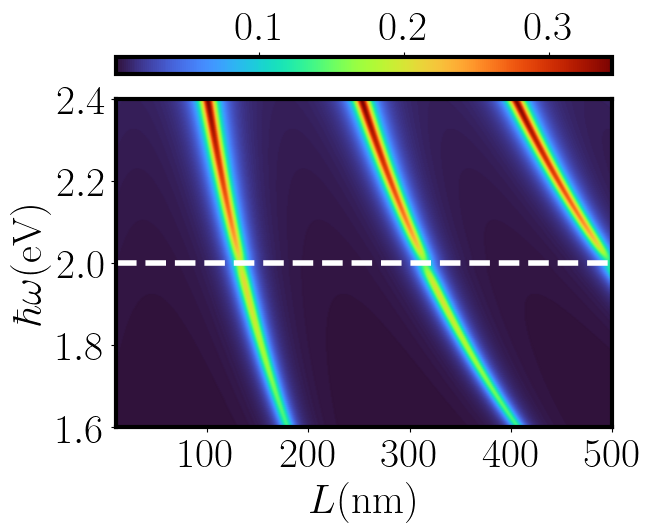

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, TplistAg.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
ax.axhline(y=2.0, color='w', linestyle='--', linewidth=4)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig9a.pdf", bbox_inches='tight')

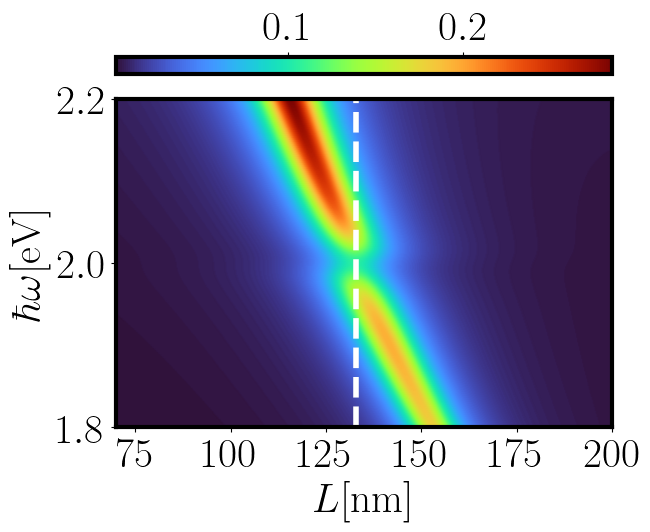

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{[nm]}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, TplistAg.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
ax.axvline(x=133.0, color='w', linestyle='--', linewidth=4)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig9a_Extended.pdf", bbox_inches='tight')

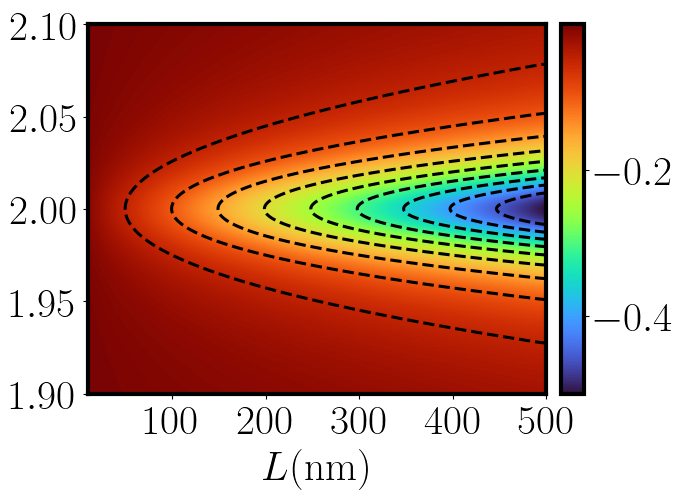

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im = ax.pcolormesh(coupl, omega, DCTlistAg.T*1e3, cmap = "turbo", shading = "gouraud")
#fmt = mpl.ticker.ScalarFormatter(useMathText=True)
#fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.15)
ax.set_ylim(1.9,2.1)
cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticklocation = 'right') #orientation='horizontal'les = 'dashed')
CS = ax.contour(coupl, omega, gaussian_filter(DCTlistAg.T, 5.), 9, colors='k', linewidths = 2.2, linestyles = 'dashed')
#cbar.set_label(r'$10^{4}\,\mathcal{DCT}_{\perp}$', labelpad = 7, y = 1.05, rotation = 0, size = 25)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
fig.savefig("Fig9b.pdf", bbox_inches='tight')

## Fig. 10

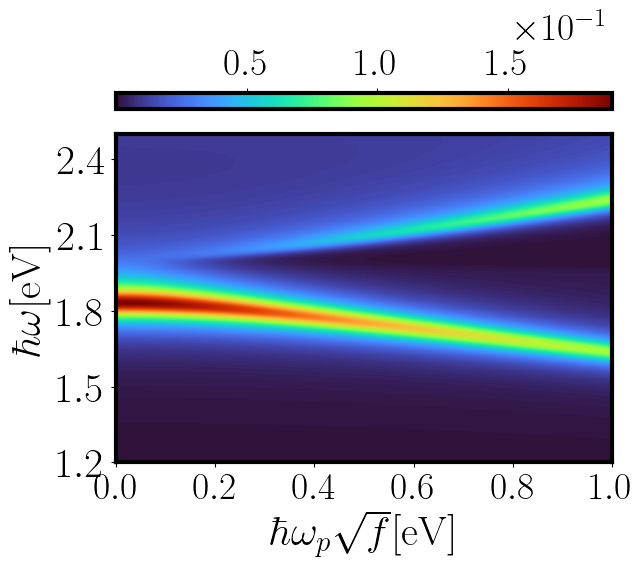

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$\hbar\omega_{p}\sqrt{f}\mathrm{[eV]}$",size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, TplistAg.T, cmap = "turbo", shading = "gouraud")
fmt = mpl.ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top', format=fmt)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 27      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.3))
#fig.savefig("Fig10a.pdf", bbox_inches='tight')

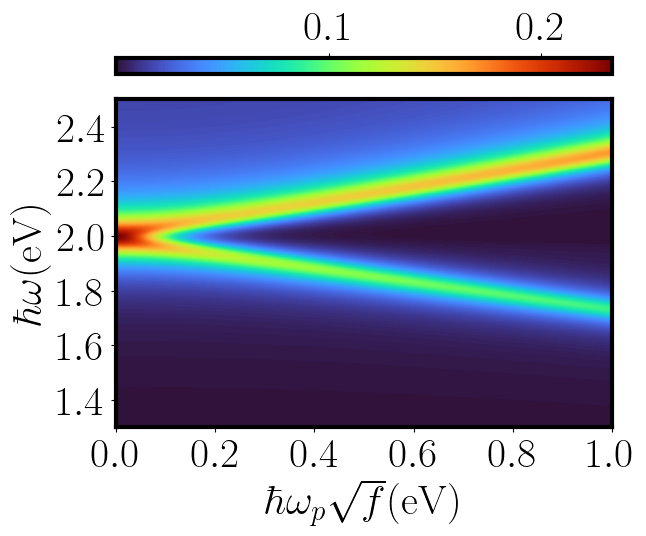

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$\hbar\omega_{p}\sqrt{f}\mathrm{(eV)}$",size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)
#ax.text(0.4,2.3,"UP",color="w",fontsize=25)
#ax.axline(x=133.0, color='w', linestyle='--', linewidth=4)
#x1, y1 = [0.2, 0.2], [2.06-0.2/np.sqrt(2.89), 2.06]
#plt.plot(x1, y1, marker = 'o', color = 'white')#, linewidth = 7)
#ax.text(0.82, 1.98, r'$\frac{\hbar\omega_{p}\sqrt{f}}{n_{\infty}}$', color="white", fontsize=26)
im1 = ax.pcolormesh(coupl, omega, TplistAg.T, cmap = "turbo", shading = "gouraud")
#fmt = mpl.ticker.ScalarFormatter(useMathText=True)
#fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')#, format=fmt)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.set_ylim(1.3,2.5)
ax.set_yticks([1.4,1.6,1.8,2.0,2.2,2.4])
ax.xaxis.set_major_locator(MultipleLocator(0.2))
#ax.yaxis.set_major_locator(MultipleLocator(0.3))
fig.savefig("Fig10a.pdf", bbox_inches='tight')

In [107]:
print(0.8/np.sqrt(2.89))
print(2.2-(0.8/np.sqrt(2.89)))

0.4705882352941177
1.7294117647058824


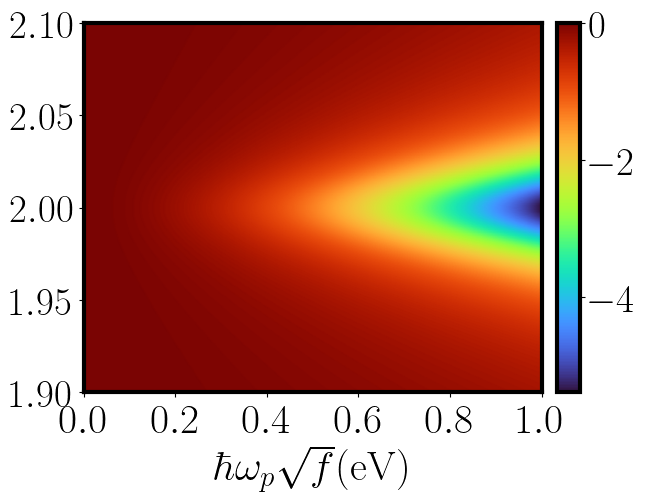

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$\hbar\omega_{p}\sqrt{f}\mathrm{(eV)}$",size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTlistAg.T*1e2, cmap = "turbo", shading = "gouraud")
#fmt = mpl.ticker.ScalarFormatter(useMathText=True)
#fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.15)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')#, format=fmt)
#cbar.set_label(r'$\mathcal{DCT}_{\perp}$', labelpad = 27, y = 1.05, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 28
#ax.set_yticks([-5,-4,-3,-1,0])
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
fig.savefig("Fig10b.pdf", bbox_inches='tight')

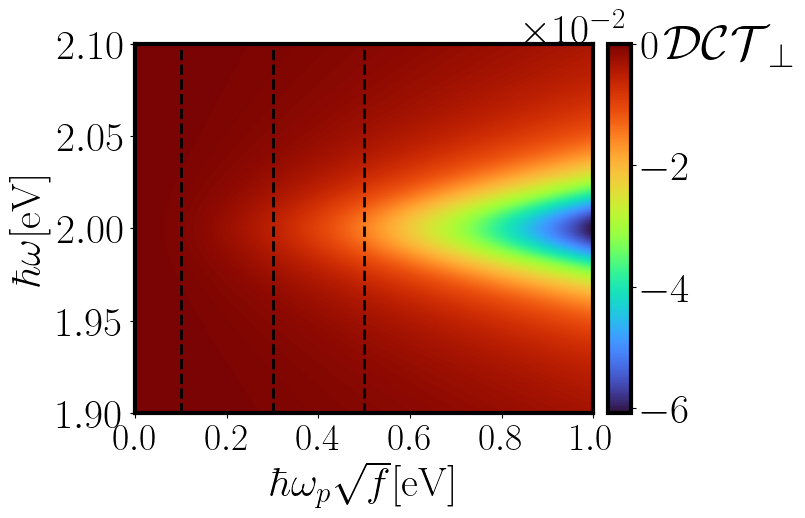

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$\hbar\omega_{p}\sqrt{f}\mathrm{[eV]}$",size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTlistAg.T, cmap = "turbo", shading = "gouraud")
fmt = mpl.ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.15)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right', format=fmt)
ax.axvline(x=0.1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=0.3, color='black', linestyle='--', linewidth=2)
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=2)
cbar.set_label(r'$\mathcal{DCT}_{\perp}$', labelpad = 27, y = 1.05, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 27      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#fig.savefig("Fig10bCuts.pdf", bbox_inches='tight')

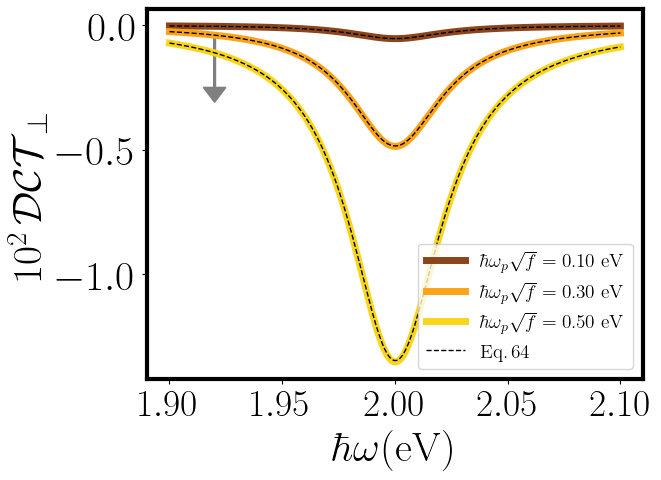

In [61]:
############
# DCT WEAK K
##################################################################################
def DeltaDCTWeakK(omega, omega0, dmol, gamma, omegap, kappa):
    num = 4 * np.pi * (omega / 1239.842) * dmol * (omegap**2) * gamma * (omega**2)
    den = omega0 * ((omega0**2-omega**2)**2 + (gamma*omega)**2)
    form = -2 * kappa * (num / den)
    return form
##################################################################################
dct1 = DeltaDCTWeakK(omega, 2.0, 133, 0.05, 0.1, 1e-3)
dct2 = DeltaDCTWeakK(omega, 2.0, 133, 0.05, 0.3, 1e-3)
dct3 = DeltaDCTWeakK(omega, 2.0, 133, 0.05, 0.5, 1e-3)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)
ax.set_ylabel(r"$10^2\,\mathcal{DCT}_{\perp}$",size = 30)

for omegapcut,color in [(0.1,'#8b441b'), (0.3,'#fca318'), (0.5,'#f9d61a')]:
    icut = np.argmin(abs(coupl-omegapcut))
    ax.plot(omega, 1e2*DCTlistAg.T[:,icut], color=color, lw=5,label=r'$\hbar\omega_p\sqrt{f} = %.2f$ $\mathrm{eV}$' % omegapcut)
    ax.legend(loc="lower right")
ax.plot(omega, 1e2*dct1, color='k', lw=1, linestyle='--', label=r'$\mathrm{Eq.\,64}$')
ax.plot(omega, 1e2*dct2, color='k', lw=1, linestyle='--')
ax.plot(omega, 1e2*dct3, color='k', lw=1, linestyle='--')
plt.arrow(1.92, -0.05, 0, -0.2, head_length=0.06, head_width = 0.01, width = 0.0008, color= 'grey', linestyle = '-')
#plt.arrow(2, -0.6, 0, -0.3, head_length=0.06, head_width = 0.01, width = 0.0008, color= 'grey', linestyle = '-')
#ax.text(1.92, -0.18, r'$\hbar\omega_{p}\sqrt{f}$', color="black", fontsize=17)
ax.legend(loc="lower right", fontsize = 14)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 12
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 27      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(0.05))
#ax.yaxis.set_major_locator(MultipleLocator(2.5))
fig.savefig("Fig10bCuts.pdf", bbox_inches='tight')

## Fig. 11

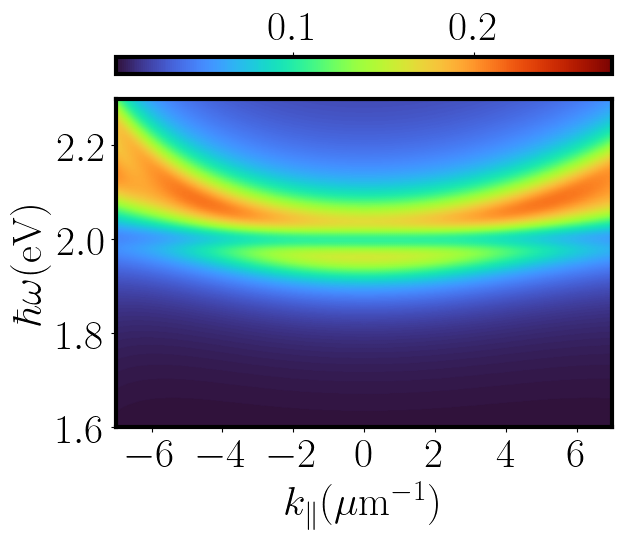

In [70]:
listOmega = []
for i in range(len(coupl)):
    omegaNew = omega[i]
    listOmega.append(omegaNew)

kParall = []
for i in range(len(coupl)):
    lamb = 1239.842 / listOmega[i]
    kparal = (2 * np.pi * np.sin(coupl[i]) * 1e3) / lamb 
    kParall.append(kparal)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$k_{\parallel}\mathrm{(\mu m^{-1})}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$", size = 30)

im1 = ax.pcolormesh(kParall, listOmega, TplistAg.T, cmap = "turbo", shading = "gouraud")
#fmt = mpl.ticker.ScalarFormatter(useMathText=True)
#fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')#, format=fmt)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_xlim((-7,7))
fig.savefig("Fig10a.pdf", bbox_inches='tight')

(1.9, 2.1)

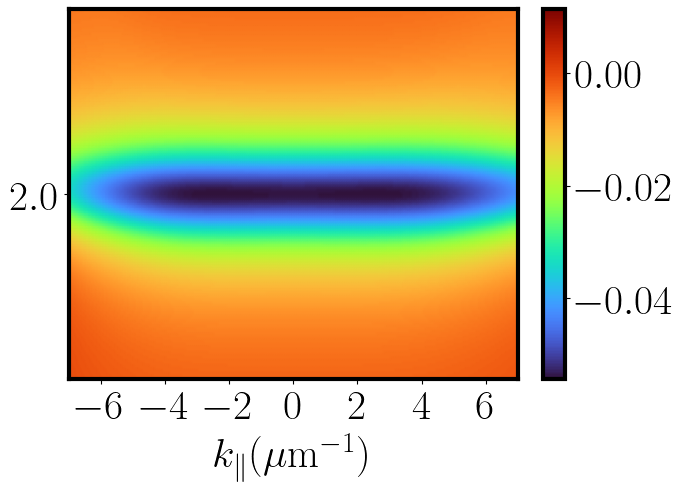

In [112]:
listOmega = []
for i in range(len(coupl)):
    omegaNew = omega[i]
    listOmega.append(omegaNew)

kParall = []
for i in range(len(coupl)):
    lamb = 1239.842 / listOmega[i]
    kparal = (2 * np.pi * np.sin(coupl[i]) * 1e3) / lamb 
    kParall.append(kparal)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$k_{\parallel}\mathrm{(\mu m^{-1})}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$", size = 30)

im1 = ax.pcolormesh(kParall, listOmega, DCTlistAg.T*1e2, cmap = "turbo", shading = "gouraud")
#fmt = mpl.ticker.ScalarFormatter(useMathText=True)
#fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')#, format=fmt)#, format=fmt)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_xlim((-7,7))
#ax.set_ylim((1.9,2.1))
#fig.savefig("Fig11b.pdf", bbox_inches='tight')

## Fig. 13

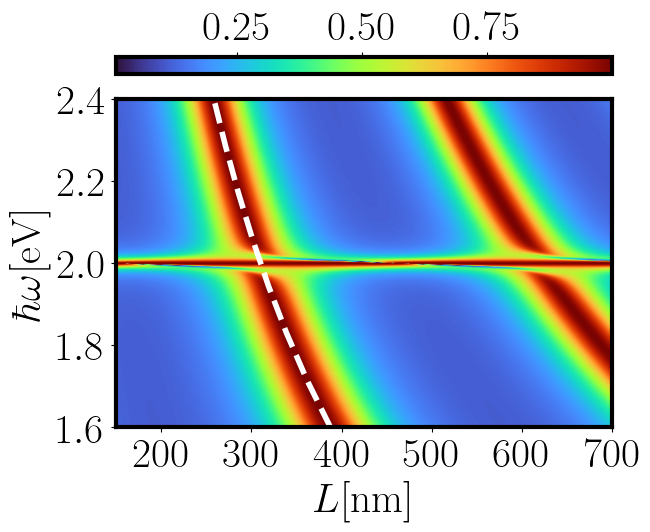

In [5]:
omega1 = np.linspace(1.6, 2.4, 8)

listOmegaL = []
for i in range(len(omega1)):
    L = (1239.8) / (2 * omega1[i])
    listOmegaL.append(L)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{[nm]}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, Tplist.T, cmap = "turbo", shading = "gouraud")
ax.plot(listOmegaL, omega1, 'w--', linewidth = 4)
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig13a.pdf", bbox_inches='tight')

In [6]:
dJ = np.linspace(150, 700, 500)
omegaJ  = np.linspace(1.6, 2.4, 500)[:,None]

#eps_mol, n_mol, k_mol = eps_DL(epsinf=2.89, omegap=omegapJ, omega=omegaJ, omega0=1.9, gamma=0.1, k0=1e-3)
#eps_Ag, n_Ag, k_Ag  = eps_DL(epsinf=4.77574276, omegap=9.48300763, omega=omegaJ, omega0=0, gamma=0.17486845, k0=0.0)

air_infty = ts.MaterialLayer(d=np.inf, eps=1)
air  = ts.MaterialLayer(d=dJ,      eps=1)
#Ag_mirror = ts.MaterialLayer(d=16,     eps=eps_Ag)
#molecules = ts.MaterialLayer(d=dmol,    eps=eps_mol, kappa=k_mol)
#moleculesK0 = ts.MaterialLayer(d=dmol,  eps=eps_mol_kappa0, kappa=k_mol_kappa0)

omegaPR = 2
gammaPR = 0.01
mirror_1 = ts.helicity_preserving_mirror(omegaJ,omegaPR=omegaPR,gammaPR=gammaPR,enantiomer=False)
mirror_2 = ts.helicity_preserving_mirror(omegaJ,omegaPR=omegaPR,gammaPR=gammaPR,enantiomer=True)

#S_Ag = ts.TScat([air_infty, Ag_mirror,          molecules, Ag_mirror,          air_infty], omegaJ, theta0=0.)
#S_Ag_kappa0 = ts.TScat([air_infty, Ag_mirror,   moleculesK0, Ag_mirror,          air_infty], omegaJ, theta0=0.)
S_HP = ts.TScat([air_infty, mirror_1, air, mirror_2, air_infty], omegaJ, theta0=0.)
#S_HP_kappa0 = ts.TScat([air_infty, mirror_1, air_thin, moleculesK0, air_thin, mirror_2, air_infty], omegaJ, theta0=0.)

#S_HP.ΔDCTs = S_HP.DCTs[1] - S_HP.DCTs[0] 
#S_Ag.ΔDCTs = S_Ag.DCTs[1] - S_Ag.DCTs[0]

DCT_HP = S_HP.DCTs  
Tp_HP = S_HP.Tsp 

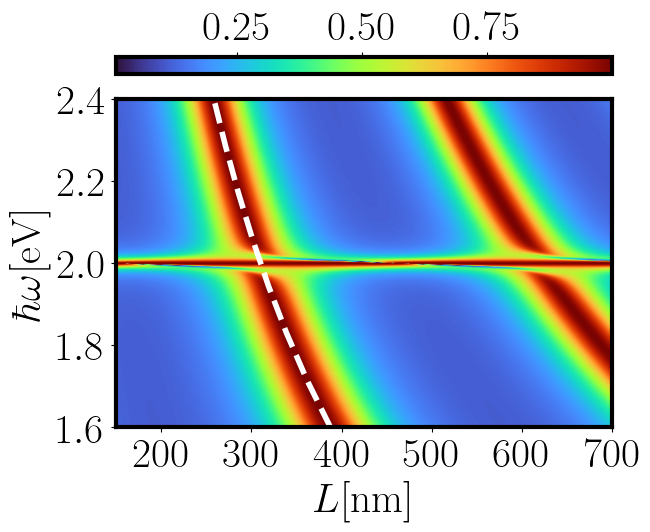

In [7]:
omega1 = np.linspace(1.6, 2.4, 8)

listOmegaL = []
for i in range(len(omega1)):
    L = (1239.8) / (2 * omega1[i])
    listOmegaL.append(L)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{[nm]}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(dJ, omegaJ, Tp_HP, cmap = "turbo", shading = "gouraud")
ax.plot(listOmegaL, omega1, 'w--', linewidth = 4)
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig13aJ.pdf", bbox_inches='tight')

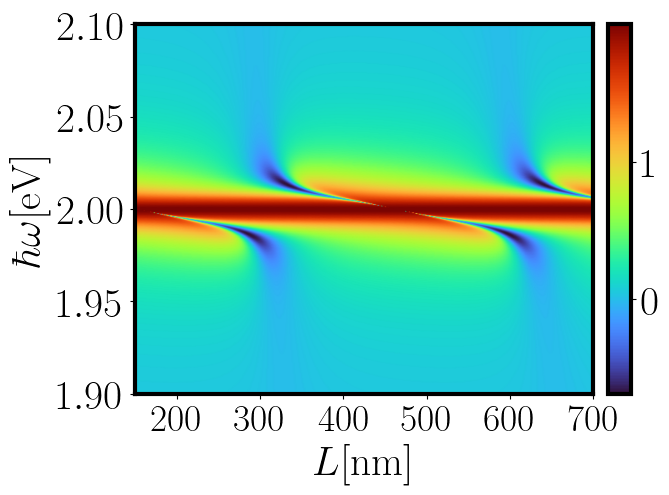

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{[nm]}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTlist.T, cmap = "turbo", shading = "gouraud")
fmt = mpl.ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.15)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right', format = fmt)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 27      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#fig.savefig("Fig13b.pdf", bbox_inches='tight')

## Fig. 14

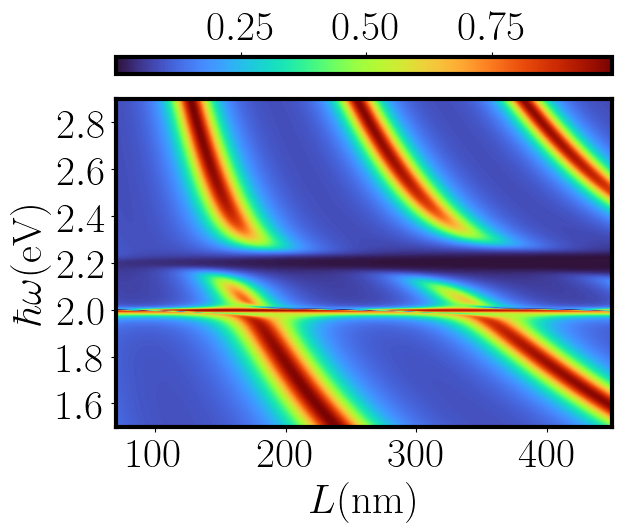

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, Tplist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig14a.pdf", bbox_inches='tight')

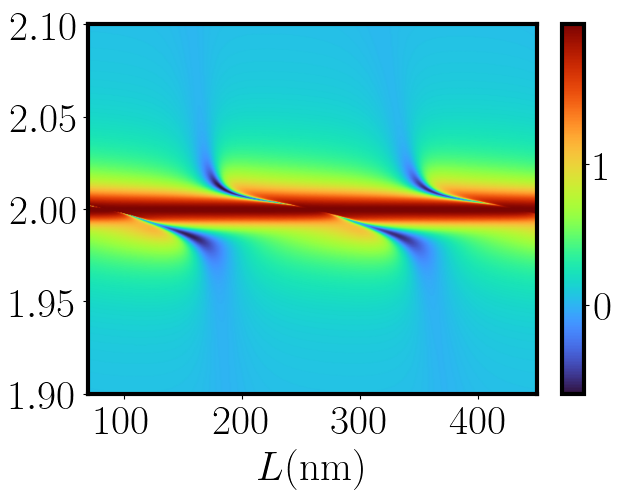

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTlist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
fig.savefig("Fig14b.pdf", bbox_inches='tight')

## Fig. 15

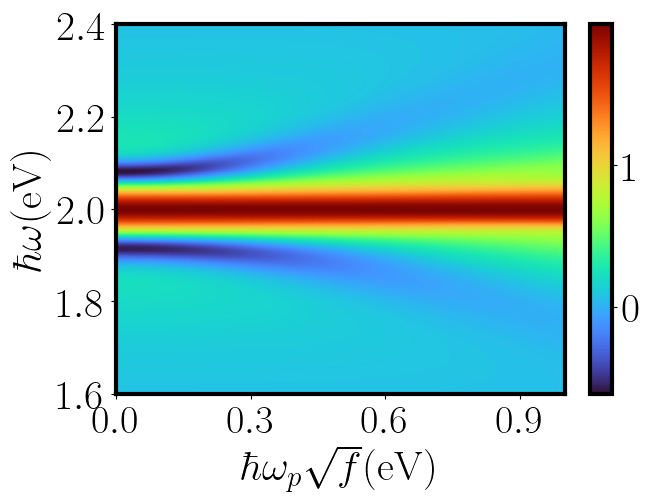

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$\hbar\omega_{p}\sqrt{f}\mathrm{(eV)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTlist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 29      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(0.3))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig15.pdf", bbox_inches='tight')

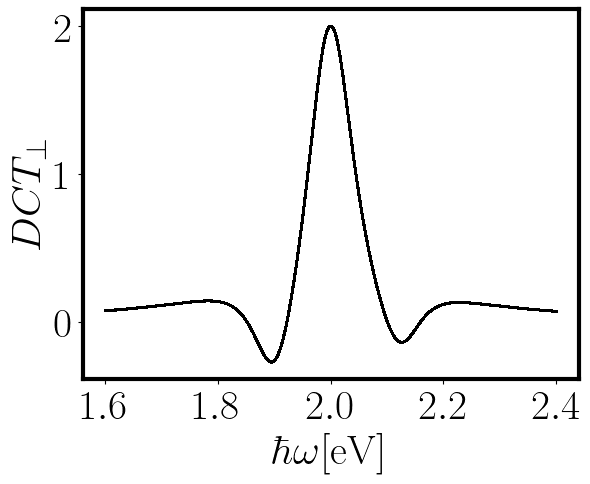

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_ylabel(r"$DCT_{\perp}$", size = 30)
ax.set_xlabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

#im1 = ax.pcolormesh(coupl, omega, DCTlist.T, cmap = "turbo", shading = "gouraud")
ax.plot(omega, DCTlist.T, color = 'black')
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.25)
#cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
#ax.xaxis.set_major_locator(MultipleLocator(0.3))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig15_compl.pdf", bbox_inches='tight')

## Fig. 16 (a)

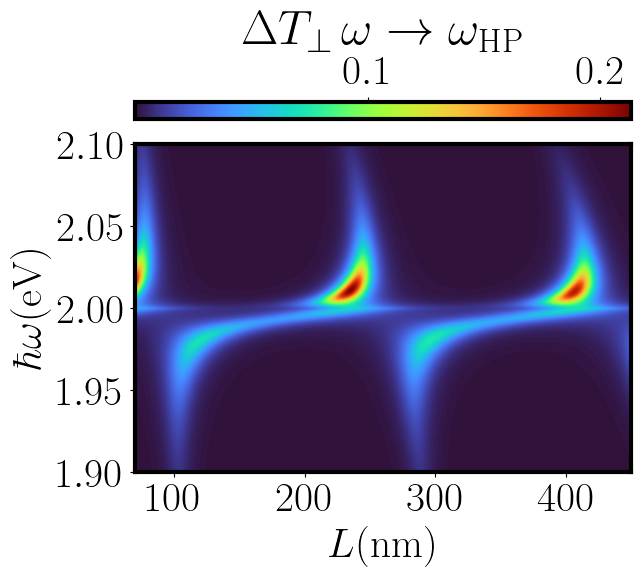

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, TpHYlist.T-TmHYlist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
cbar.set_label(r'$\Delta T_{\perp}\,\omega\rightarrow\omega_{\mathrm{HP}}$', labelpad = 7, y = 1.05, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#ax.set_ylim((1.9,2.1))
fig.savefig("Fig16a_DeltaT_zoom.pdf", bbox_inches='tight')

## Fig. 16 (b)

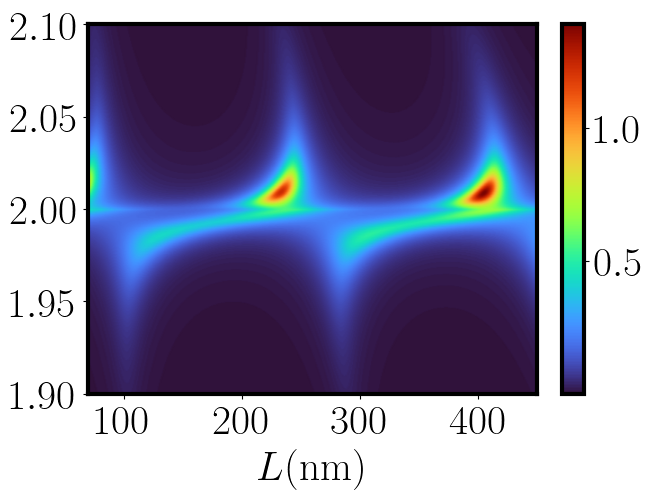

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTHYlist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')
#cbar.set_label(r'$\mathcal{DCT}_{\perp}$', labelpad = 18, y = 1.07, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
fig.savefig("Fig16b.pdf", bbox_inches='tight')

## Fig. 16 Empty

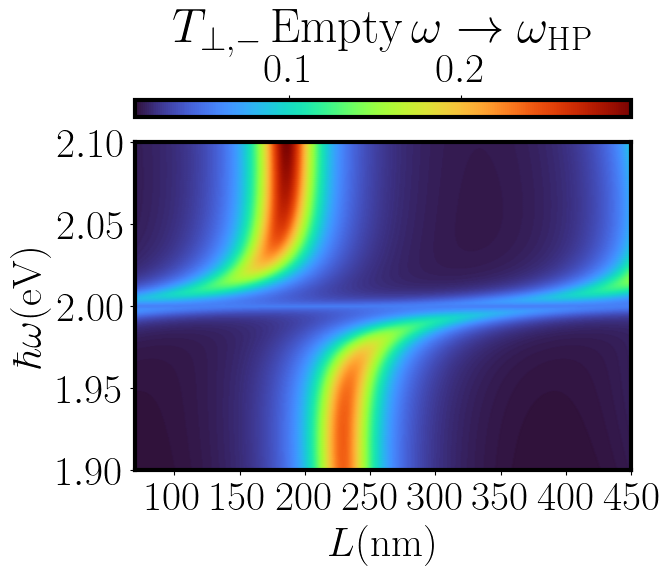

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
ax.set_ylabel(r"$\hbar \omega \mathrm{(eV)}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, TmHYElist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
cbar.set_label(r'$T_{\perp,-}\,\mathrm{Empty}\,\omega\rightarrow\omega_{\mathrm{HP}}$', labelpad = 7, y = 1.05, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
#ax.set_ylim((1.9,2.1))
fig.savefig("Fig16a_T-_Empty_zoom.pdf", bbox_inches='tight')

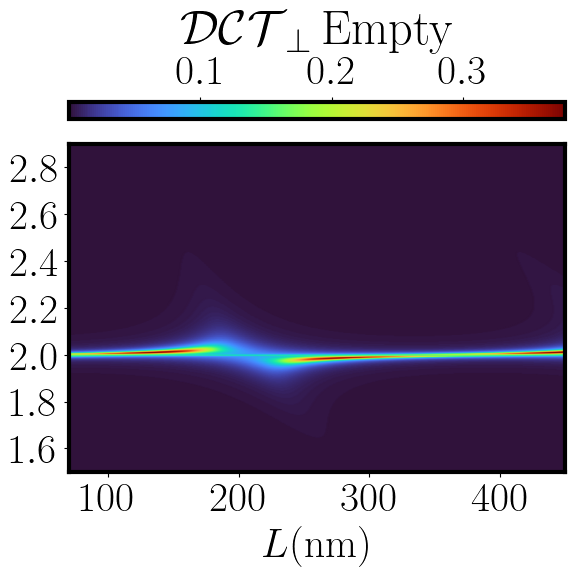

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTHYElist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal', ticklocation = 'top')
cbar.set_label(r'$\mathcal{DCT}_{\perp}\,\mathrm{Empty}$', labelpad = 7, y = 1.05, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("DCT_Empty.pdf", bbox_inches='tight')

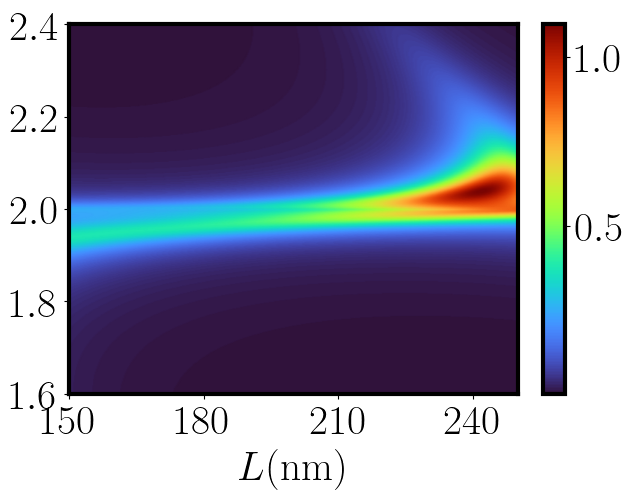

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)
#ax.axvline(x=220, color='black', linestyle='--', linewidth=2)
#ax.axvline(x=215, color='black', linestyle='--', linewidth=2)
im1 = ax.pcolormesh(coupl, omega, DCTHYlist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')
#cbar.set_label(r'$\mathcal{DCT}_{\perp}$', labelpad = 18, y = 1.07, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
fig.savefig("Fig17_tuning.pdf", bbox_inches='tight')

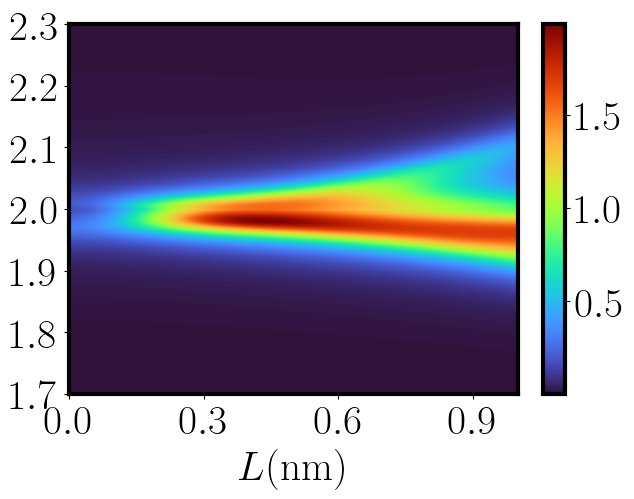

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False)

ax.set_xlabel(r"$L\mathrm{(nm)}$", size = 30)
#ax.set_ylabel(r"$\hbar \omega \mathrm{[eV]}$",size = 30)

im1 = ax.pcolormesh(coupl, omega, DCTHYlist.T, cmap = "turbo", shading = "gouraud")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticklocation = 'right')
#cbar.set_label(r'$\mathcal{DCT}_{\perp}$', labelpad = 18, y = 1.07, rotation = 0, size = 35)
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['legend.fontsize']= 11
#plt.rcParams['lines.linewidth'] = 80
plt.rcParams['xtick.labelsize'] = 30      
plt.rcParams['ytick.labelsize'] = 30
ax.xaxis.set_major_locator(MultipleLocator(0.3))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
fig.savefig("Fig17.pdf", bbox_inches='tight')